A neural network for the prediction of Diabetes...

Steps
1. import all necessary libraries
2. Load Data.
3. Define Keras Model.
4. Compile Keras Model.
5. Fit Keras Model.
6. Evaluate Keras Model.
7. Make Predictions
8. Get confusion_metrix
9. Get accuracy_score



In [125]:
#importing necessary libraries
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import seaborn as sns

In [126]:
#loading data
data=pd.read_csv('pima-indians-diabetes.csv',names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Class'])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [127]:
# Dividing data into dependent and independent variables
# Independent variables
X=data.iloc[:,0:8]


In [128]:
# Dependent variable
y=data['Class']


In [129]:
#Splitting the dataset into the Training set and Test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [130]:
# Feature Scaling
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [131]:
# Creating model 
model=Sequential()
model.add(Dense(12,kernel_initializer='he_uniform',activation='relu', input_dim=X.shape[1]))
model.add(Dense(8,kernel_initializer='he_uniform',activation='relu'))
model.add(Dense(1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [132]:
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_15 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


In [133]:
# compiling model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [134]:
# training model
comp=model.fit(X_train,y_train, batch_size=10, epochs=70,validation_split=0.33,verbose=1)

Epoch 1/70
42/42 [==============================] - 1s 5ms/step - loss: 0.7884 - accuracy: 0.5273 - val_loss: 0.6309 - val_accuracy: 0.6798
Epoch 2/70
42/42 [==============================] - 0s 2ms/step - loss: 0.6998 - accuracy: 0.5585 - val_loss: 0.6052 - val_accuracy: 0.6847
Epoch 3/70
42/42 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6420 - val_loss: 0.5896 - val_accuracy: 0.7044
Epoch 4/70
42/42 [==============================] - 0s 6ms/step - loss: 0.6285 - accuracy: 0.6091 - val_loss: 0.5780 - val_accuracy: 0.6946
Epoch 5/70
42/42 [==============================] - 0s 2ms/step - loss: 0.6010 - accuracy: 0.6705 - val_loss: 0.5720 - val_accuracy: 0.6847
Epoch 6/70
42/42 [==============================] - 0s 2ms/step - loss: 0.5772 - accuracy: 0.6663 - val_loss: 0.5663 - val_accuracy: 0.6847
Epoch 7/70
42/42 [==============================] - 0s 2ms/step - loss: 0.5200 - accuracy: 0.7817 - val_loss: 0.5686 - val_accuracy: 0.6995
Epoch 8/70
42/42 [==

In [135]:
# evaluating model
_,eva=model.evaluate(X_train,y_train)
print('Accuracy: %.2f' % (eva*100))

20/20 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.8062
Accuracy: 80.62


In [136]:
print(comp.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


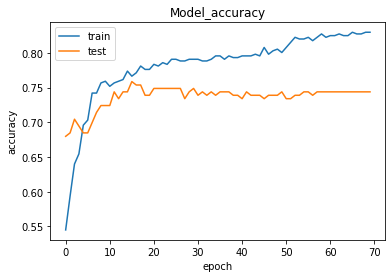

In [137]:
# Graphical presentation of accuracy and val_accuracy
plt.plot(comp.history['accuracy'])
plt.plot(comp.history['val_accuracy'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

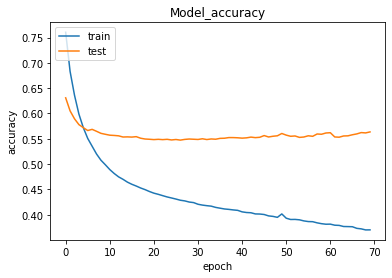

In [138]:
# Graphical presentation of loss and val_loss
plt.plot(comp.history['loss'])
plt.plot(comp.history['val_loss'])
plt.title('Model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [139]:
# prediction
y_pred=model.predict_classes(X_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


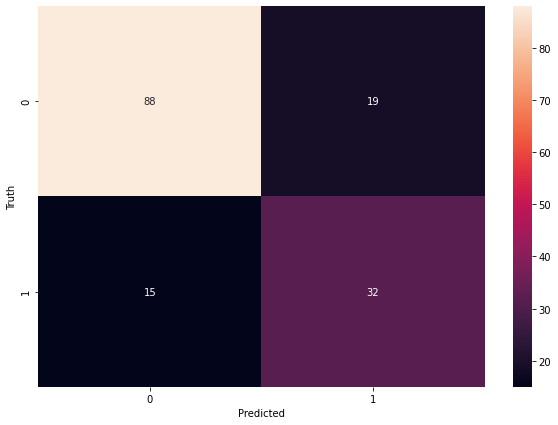

In [140]:
# printing confusion metrix using seaborn and accuracy_score...
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [141]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7792207792207793